# 1. Preliminary

## 1.1 Context

blabla

## 1.2 Requirements

* pandas
* numpy


* scikit-learn


* matplotlib

## 1.3 Imports

In [73]:
# builtin 
import os


# data
import pandas as pd
import numpy as np


# preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import roc_curve, auc

# visualisation
import matplotlib.pyplot as plt


## 1.4 Data

In [74]:
pwd = os.getcwd()

In [75]:
os.listdir()

['.DS_Store',
 'requirements.txt',
 '00_tp.ipynb',
 'tp.py',
 'env',
 'img',
 '.ipynb_checkpoints',
 'data']

In [80]:
os.listdir("data/source/")

['TP_2_datset_mushrooms.csv', 'mushrooms.csv']

In [81]:
os.listdir("img")

['tree.jpg']

<img src="img/tree.jpg"
     alt="img/tree.jpg" />

In [82]:
# écrivons 2 varibales pour retrouver nos fichiers

path     = "./data/source/"           # mettez votre chemin de fichier
filename = "mushrooms.csv"   # mettez le nom de votre fichier .csv

In [83]:
# chargeons nos données

df = pd.read_csv(path + filename)

In [84]:
# verifions que le chargment c'est bien effectué

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2. First Tour

## 2.1 Display

In [85]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [10]:
df.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4532,p,x,f,y,f,f,f,c,b,p,...,k,n,p,p,w,o,l,h,y,g
3452,p,x,f,g,f,c,f,w,n,n,...,s,w,w,p,w,o,p,n,v,d
1881,e,x,f,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
6968,p,f,s,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,p
2585,e,x,y,g,t,n,f,c,b,p,...,s,p,p,p,w,o,p,n,v,d
5374,p,x,s,w,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,s,g
3409,e,f,y,n,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,v,d
4866,p,f,f,g,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,v,p
2306,e,f,y,g,t,n,f,c,b,p,...,s,g,g,p,w,o,p,n,v,d
738,e,x,s,w,t,l,f,c,b,g,...,s,w,w,p,w,o,p,k,s,g


## 2.2 Structure

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
df.dtypes.value_counts()

object    23
dtype: int64

In [13]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## 2.3 Nan & Duplicated

In [14]:
df.isna().mean()

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [15]:
df.duplicated().sum()

0

## 2.4 Data inspection

In [16]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [17]:
df.iloc[:, 0].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [18]:
df.iloc[:, 0].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

<AxesSubplot:ylabel='class'>

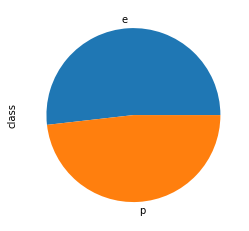

In [19]:
df.iloc[:, 0].value_counts().plot(kind="pie")

# 3. Cleaning

## 3.1 Label encoding 

In [20]:
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [23]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## 3.2 Rename "class" in target

In [24]:
df = df.rename(columns={"class": "target" })
df

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


# 4. Modelisation

## 4.1 Data preparation

In [25]:
# On récupère les features d'un côté...
X = df.drop(columns="target")

# et les labels de l'autre
y = df.target

In [26]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [27]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [86]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [87]:
# validons la forme de nos données

print(f"Nous avons X_train de forme {X_train.shape} et y_train de forme  {y_train.shape}  ")
print(f"Nous avons X_test de forme {X_test.shape} et y_test de forme  {y_test.shape}  ")

Nous avons X_train de forme (5443, 22) et y_train de forme  (5443,)  
Nous avons X_test de forme (2681, 22) et y_test de forme  (2681,)  


## 4.2 Dummy classifier

In [88]:
estimator = DummyClassifier()
estimator.fit(X_train, y_train)

DummyClassifier()

In [89]:
estimator.score(X_train, y_train).round(2)

0.52

In [90]:
estimator.score(X_test, y_test).round(2)

0.51

In [91]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
y_test.value_counts()

0    1378
1    1303
Name: target, dtype: int64

In [93]:
pd.Series(y_pred).value_counts()

0    2681
dtype: int64

In [94]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.5


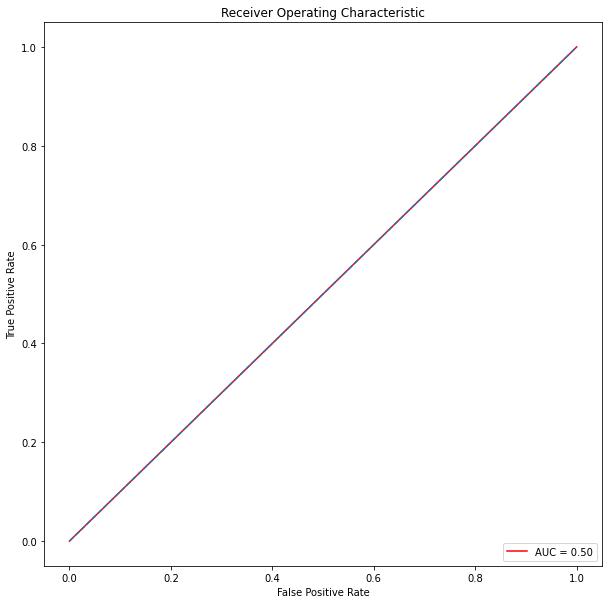

In [95]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1378,    0],
       [1303,    0]])

In [97]:
mat = pd.DataFrame(mat)
mat

,0,1
0,1378,0
1,1303,0


In [98]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1378,0
test_1,1303,0


## 4.3 Logistic regression

### 4.3.1  Without GridSearch

In [99]:
# Entrainons la Regression Logistique

lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
# On récupère la prédiction de la valeur positive
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [101]:
# on peut accéder directement aux probalités de la classe 0 ou 1 de cette façon

y_prob = lr.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.96, 0.04],
       [0.01, 0.99],
       [0.97, 0.03]])

In [102]:
lr.score(X_train, y_train).round(2)

0.95

In [103]:
lr.score(X_test, y_test).round(2)

0.95

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


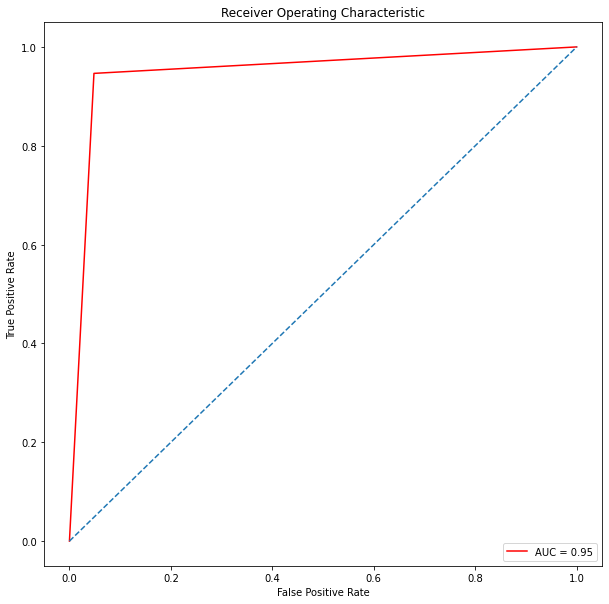

In [47]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1201,61
test_1,63,1113


### 4.3.2 Using GridSearch

In [49]:
estimator = LogisticRegression(solver = 'liblinear')
params = {  'C': np.logspace(-3, 3, 7) , 
            'penalty':['l1','l2'] }

In [50]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [51]:
print(grid.best_params_)

{'C': 1000.0, 'penalty': 'l1'}


In [52]:
res = grid.cv_results_
res

{'mean_fit_time': array([0.00943017, 0.01240945, 0.03340106, 0.01489263, 0.0995645 ,
        0.0241456 , 3.51848483, 0.03185191, 4.9030858 , 0.0681458 ,
        4.55711818, 0.0893466 , 4.54045362, 0.10834117]),
 'std_fit_time': array([0.00252243, 0.00290569, 0.00314491, 0.00291743, 0.00607092,
        0.00372451, 1.25785588, 0.00297521, 1.19538546, 0.01259663,
        1.08643438, 0.02196857, 1.12082708, 0.02231967]),
 'mean_score_time': array([0.00188041, 0.00183549, 0.00130553, 0.00157828, 0.00156174,
        0.00135827, 0.00265484, 0.00121799, 0.00266957, 0.00184321,
        0.00245066, 0.00252028, 0.00092473, 0.0015018 ]),
 'std_score_time': array([0.00062934, 0.00120739, 0.00033245, 0.00096793, 0.0008814 ,
        0.00077919, 0.00124162, 0.00086223, 0.00121468, 0.00091999,
        0.00255029, 0.00201779, 0.00018522, 0.00065699]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0,
                    10.0, 100.0, 100.0, 1000.0, 1000.0],
              

In [53]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009430,0.002522,0.001880,0.000629,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.764499,0.773967,0.767810,...,0.767851,0.008177,14,0.768690,0.766322,0.767861,0.765223,0.771158,0.767851,0.002044
1,0.012409,0.002906,0.001835,0.001207,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.865554,0.872471,0.863676,...,0.866339,0.003684,13,0.865875,0.868103,0.869642,0.869202,0.868323,0.868229,0.001304
2,0.033401,0.003145,0.001306,0.000332,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.905975,0.906772,0.893580,...,0.905030,0.005889,12,0.904573,0.906353,0.907013,0.903715,0.905034,0.905338,0.001195
3,0.014893,0.002917,0.001578,0.000968,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.915641,0.912929,0.905893,...,0.911009,0.003927,11,0.912489,0.914047,0.913827,0.911849,0.914267,0.913296,0.000952
4,0.099565,0.006071,0.001562,0.000881,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.951670,0.946350,0.948989,...,0.947590,0.002657,9,0.948109,0.950099,0.949000,0.946142,0.947681,0.948206,0.001324
5,0.024146,0.003725,0.001358,0.000779,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.947276,0.940193,0.937555,...,0.940555,0.003562,10,0.941953,0.943504,0.941086,0.939107,0.941306,0.941391,0.001421
6,3.518485,1.257856,0.002655,0.001242,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.971880,0.961302,0.966579,...,0.966232,0.003419,6,0.968997,0.967465,0.966146,0.963069,0.971642,0.967464,0.002859
7,0.031852,0.002975,0.001218,0.000862,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.957821,0.950748,0.951627,...,0.952690,0.003413,8,0.952287,0.954276,0.954495,0.951638,0.952737,0.953086,0.001119
8,4.903086,1.195385,0.002670,0.001215,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.981547,0.969217,0.973615,...,0.976608,0.004611,4,0.979551,0.979776,0.977797,0.975379,0.979116,0.978324,0.001624
9,0.068146,0.012597,0.001843,0.000920,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.971002,0.959543,0.964820,...,0.965001,0.003797,7,0.963940,0.965927,0.964388,0.961750,0.972521,0.965705,0.003661


In [54]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [55]:
res = res[cols]
res = res.sort_values("rank_test_score")
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
12,4.540454,1.120827,0.000925,0.000185,1000.0,l1,"{'C': 1000.0, 'penalty': 'l1'}",0.977840,0.003216,1,0.979203,0.002050
13,0.108341,0.022320,0.001502,0.000657,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.977664,0.003545,2,0.979159,0.002063
10,4.557118,1.086434,0.002451,0.002550,100.0,l1,"{'C': 100.0, 'penalty': 'l1'}",0.976961,0.003832,3,0.978896,0.001960
8,4.903086,1.195385,0.002670,0.001215,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.976608,0.004611,4,0.978324,0.001624
11,0.089347,0.021969,0.002520,0.002018,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.976257,0.003477,5,0.977840,0.001840
6,3.518485,1.257856,0.002655,0.001242,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.966232,0.003419,6,0.967464,0.002859
9,0.068146,0.012597,0.001843,0.000920,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.965001,0.003797,7,0.965705,0.003661
7,0.031852,0.002975,0.001218,0.000862,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.952690,0.003413,8,0.953086,0.001119
4,0.099565,0.006071,0.001562,0.000881,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.947590,0.002657,9,0.948206,0.001324
5,0.024146,0.003725,0.001358,0.000779,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.940555,0.003562,10,0.941391,0.001421


In [56]:
estimator = LogisticRegression(solver = 'liblinear', penalty="l2", C=1000)
estimator.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [57]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.98 score test : 0.97 


In [58]:
2/5

0.4

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


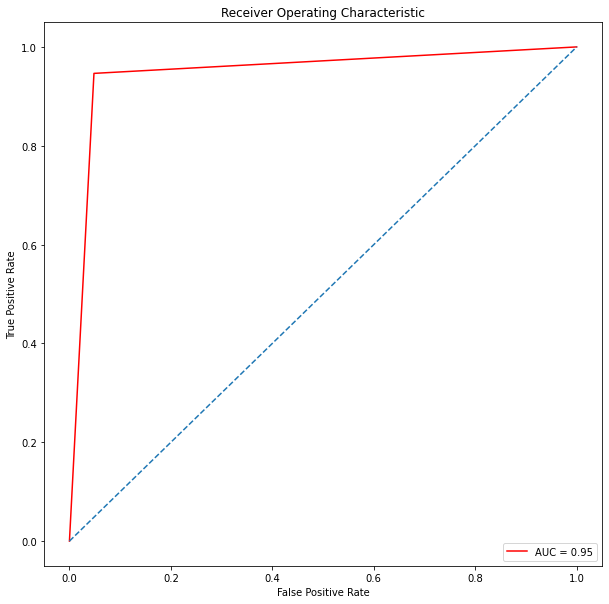

In [60]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1201,61
test_1,63,1113


## 4.4 SVM

### 4.4.1 with Gridsearch

In [62]:
estimator = LinearSVC()

params = { 'C': np.logspace(-3, 3, 7) }

In [63]:
grid = GridSearchCV(estimator, 
                    params, 
                    cv=5, 
                    n_jobs=-1, 
                    return_train_score=True, 
                    verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [64]:
print(grid.best_params_)

{'C': 1.0}


In [65]:
res = pd.DataFrame(grid.cv_results_)
cols = [i for i in res.columns if "split" not in i]
res = res[cols]
res.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,0.303587,0.014362,0.002920,0.001915,1.0,{'C': 1.0},0.953392,0.008127,1,0.953526,0.002517
5,0.307858,0.019061,0.001490,0.000751,100.0,{'C': 100.0},0.949528,0.008770,2,0.950887,0.013329
2,0.239195,0.020041,0.001955,0.001923,0.1,{'C': 0.1},0.948645,0.004718,3,0.949349,0.001144
1,0.030383,0.003192,0.001072,0.000604,0.01,{'C': 0.01},0.944072,0.002992,4,0.944865,0.001771
6,0.251678,0.065940,0.001385,0.001112,1000.0,{'C': 1000.0},0.933518,0.017831,5,0.934665,0.020715
0,0.006169,0.000758,0.000920,0.000397,0.001,{'C': 0.001},0.914526,0.003092,6,0.915362,0.000828
4,0.306734,0.016606,0.001512,0.001191,10.0,{'C': 10.0},0.887960,0.071486,7,0.890171,0.071815


In [66]:
estimator = LinearSVC(C=1.0)
estimator.fit(X_train, y_train)

/Users/alexandre.gazagnes/Desktop/content/cours/fr/entrainez-un-modele-lineaire/partie_2/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100.0)

In [67]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.93 score test : 0.93 


In [68]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.93


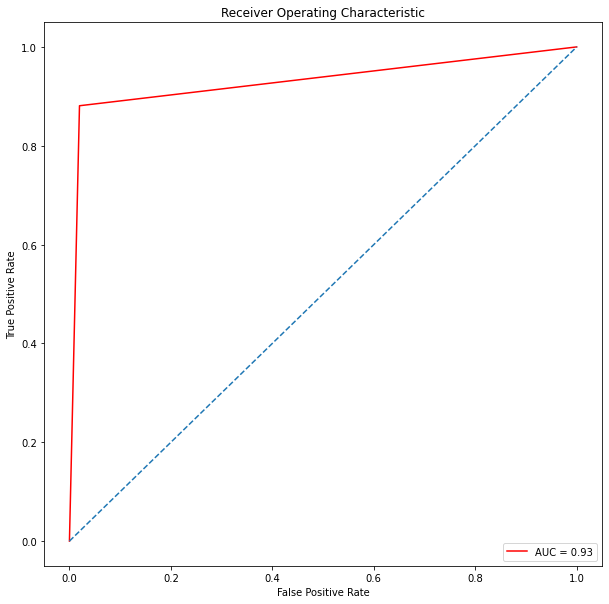

In [70]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
mat = confusion_matrix(y_test, y_pred)
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1237,25
test_1,140,1036
